Training script for kernel-KL divergence.

$ \mathcal{L}_{KL} = D_{KL}(\Sigma_{p_\theta} || \,\Sigma_\pi) = \text{Tr}\left( \Sigma_{p_\theta} \, \text{log}( \Sigma_{p_\theta} - \Sigma_\pi  )  \right), $

where 

$\Sigma_p = \sum_{x \in \mathcal{X}} \phi(x) \phi(x)^* p(x) $ 

is the kernel covariance embedding with feature map

$ \phi(x) = \phi_\eta(x) = \text{diag}(\eta)^{\frac{1}{2}} \begin{pmatrix} x \\ 1 \end{pmatrix} .$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import IQP
from qiskit.circuit import ParameterVector

import pennylane as qml

from src import QCIBM_utilities as ut

In [2]:
nq = 4
#alpha_init = np.array([[1,0],[0.1,0.3]])
#Gamma_init = np.array([1,1])
#Delta_init = np.array([0.5, 0.2])
#Sigma_init = np.array([0,0.1])
#theta_init = ut.compose_params(alpha_init, Gamma_init, Delta_init, Sigma_init)

rng = np.random.default_rng(27031995)

theta_init = np.array((np.pi) * rng.random(int(nq*(nq+3)/2)))
theta = ParameterVector('θ', int(nq*(nq+3)/2))

In [3]:
# Sample hyperparams
p_pi = 0.6
n_train = 500
sampleshots = 500

In [4]:
kernel_params = np.ones(nq+1)*(1/(nq+1)) # eta (uniform)

In [5]:
backend = Aer.get_backend('qasm_simulator')

In [6]:
alpha, Gamma, Delta, Sigma = ut.decompose_params(theta, nq)
qc = ut.QCIBM(alpha, Gamma, Delta, Sigma, nq)
qc = transpile(qc, backend)

In [7]:
# Samples modes
T = 3
ps = 0.4
pi_modes = np.zeros((T,nq)) 
for t in range(T):
    for i in range(nq):
        pi_modes[t,i] = rng.binomial(1, ps)
print('modes = ', pi_modes)

modes =  [[0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
ysamples, pi_vec = ut.sample_target_pdf(n_train, pi_modes, p_pi)
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_init}))

In [9]:
def L_wrapper(theta_, xsamples):
    L = ut.KL_Hypercube_Loss(xsamples, ysamples, kernel_params)
    return(L)

def grad_wrapper(theta_, xsamples, ysamples):
    nablaL = ut.KL_Hypercube_grad(qc, theta, theta_, xsamples, ysamples, backend, kernel_params)
    return(nablaL)

In [10]:
alpha_ = 0.010 #stepsize
theta_opt, KL_history, TV_history = ut.adam(L_wrapper, grad_wrapper, theta, theta_init, backend, qc, sampleshots, ysamples, batch_size = 250, p_target = pi_vec, tol = -1, maxiter = 400, alpha = alpha_)
print('θ_opt = ', theta_opt)
print('min Loss = ', KL_history[-1])


 -- Adam Optimization -- Step t =  1
 - Current Loss =  0.04758882458141711
 -- Adam Optimization -- Step t =  2
 - Current Loss =  0.12025809380757013
 -- Adam Optimization -- Step t =  3
 - Current Loss =  0.04044584669204032
 -- Adam Optimization -- Step t =  4
 - Current Loss =  0.03354409310753992
 -- Adam Optimization -- Step t =  5
 - Current Loss =  0.03829783393853892
 -- Adam Optimization -- Step t =  6
 - Current Loss =  0.03920409528152824
 -- Adam Optimization -- Step t =  7
 - Current Loss =  0.04191981477407758
 -- Adam Optimization -- Step t =  8
 - Current Loss =  0.044275816023061854
 -- Adam Optimization -- Step t =  9
 - Current Loss =  0.04063117954782136
 -- Adam Optimization -- Step t =  10
 - Current Loss =  0.03893415632992836
 -- Adam Optimization -- Step t =  11
 - Current Loss =  0.039023978356848676
 -- Adam Optimization -- Step t =  12
 - Current Loss =  0.03999425135841683
 -- Adam Optimization -- Step t =  13
 - Current Loss =  0.03934164205695101
 -- Ad

 -- Adam Optimization -- Step t =  107
 - Current Loss =  0.021774468724927942
 -- Adam Optimization -- Step t =  108
 - Current Loss =  0.02220711281449317
 -- Adam Optimization -- Step t =  109
 - Current Loss =  0.022504031503442823
 -- Adam Optimization -- Step t =  110
 - Current Loss =  0.02173195540680406
 -- Adam Optimization -- Step t =  111
 - Current Loss =  0.022449982373689448
 -- Adam Optimization -- Step t =  112
 - Current Loss =  0.022804640962639233
 -- Adam Optimization -- Step t =  113
 - Current Loss =  0.022565678478433604
 -- Adam Optimization -- Step t =  114
 - Current Loss =  0.023207179600286842
 -- Adam Optimization -- Step t =  115
 - Current Loss =  0.023502313937660002
 -- Adam Optimization -- Step t =  116
 - Current Loss =  0.022752738139647066
 -- Adam Optimization -- Step t =  117
 - Current Loss =  0.022752738139647066
 -- Adam Optimization -- Step t =  118
 - Current Loss =  0.022263909378330782
 -- Adam Optimization -- Step t =  119
 - Current Loss

 -- Adam Optimization -- Step t =  212
 - Current Loss =  0.008883022379759797
 -- Adam Optimization -- Step t =  213
 - Current Loss =  0.00926533347167946
 -- Adam Optimization -- Step t =  214
 - Current Loss =  0.008640004828154746
 -- Adam Optimization -- Step t =  215
 - Current Loss =  0.008558890107436712
 -- Adam Optimization -- Step t =  216
 - Current Loss =  0.008089569462628399
 -- Adam Optimization -- Step t =  217
 - Current Loss =  0.007581400616337275
 -- Adam Optimization -- Step t =  218
 - Current Loss =  0.0077965314894652415
 -- Adam Optimization -- Step t =  219
 - Current Loss =  0.008377634233685871
 -- Adam Optimization -- Step t =  220
 - Current Loss =  0.008485966793344346
 -- Adam Optimization -- Step t =  221
 - Current Loss =  0.009043546390717472
 -- Adam Optimization -- Step t =  222
 - Current Loss =  0.01002292702885077
 -- Adam Optimization -- Step t =  223
 - Current Loss =  0.009366140436956716
 -- Adam Optimization -- Step t =  224
 - Current Los

 -- Adam Optimization -- Step t =  315
 - Current Loss =  0.00018349750411661425
 -- Adam Optimization -- Step t =  316
 - Current Loss =  0.000147473365294859
 -- Adam Optimization -- Step t =  317
 - Current Loss =  0.00015066650838702067
 -- Adam Optimization -- Step t =  318
 - Current Loss =  0.00014121350479379124
 -- Adam Optimization -- Step t =  319
 - Current Loss =  0.00019502664264225977
 -- Adam Optimization -- Step t =  320
 - Current Loss =  0.0002480711271879432
 -- Adam Optimization -- Step t =  321
 - Current Loss =  0.0001381645640565754
 -- Adam Optimization -- Step t =  322
 - Current Loss =  0.00013442159431242828
 -- Adam Optimization -- Step t =  323
 - Current Loss =  0.00016138561219469771
 -- Adam Optimization -- Step t =  324
 - Current Loss =  0.00016138561219469771
 -- Adam Optimization -- Step t =  325
 - Current Loss =  8.544589935133295e-05
 -- Adam Optimization -- Step t =  326
 - Current Loss =  0.00014101638305219488
 -- Adam Optimization -- Step t =

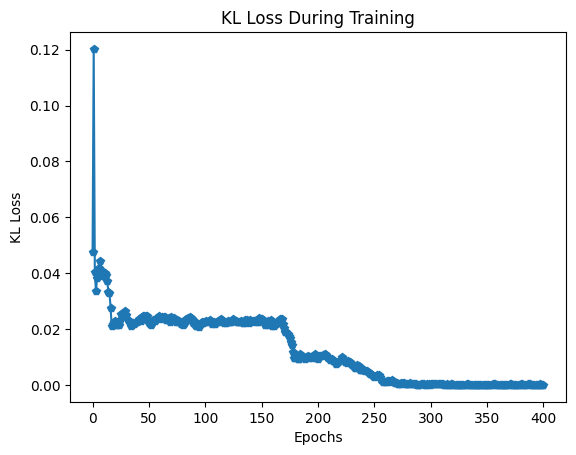

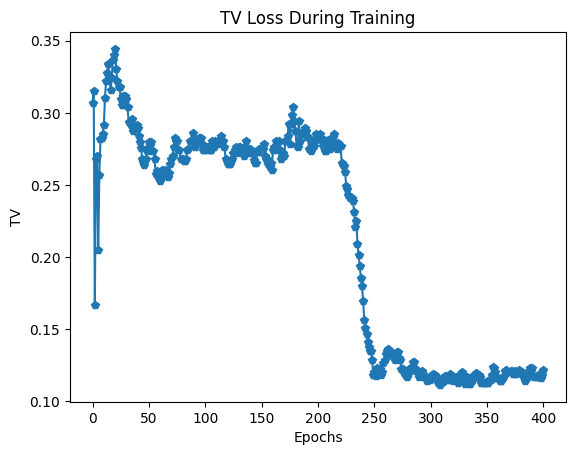

In [11]:
plt.plot(range(len(KL_history)),KL_history, marker='p')
plt.title("KL Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("KL Loss")
plt.show()

plt.plot(range(len(TV_history)),TV_history, marker='p')
plt.title("TV Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("TV")
plt.show()

In [12]:
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_opt}))

print('Original samples probs, π = ', pi_vec)
print('Optimized probabilitites, p(θ)= ', phat)

Original samples probs, π =  [0.0912     0.0848     0.0608     0.05653333 0.0768     0.0672
 0.0512     0.0448     0.0768     0.0672     0.0512     0.0448
 0.0752     0.0608     0.05013333 0.04053333]
Optimized probabilitites, p(θ)=  [0.122 0.09  0.07  0.06  0.084 0.026 0.038 0.072 0.058 0.044 0.05  0.064
 0.076 0.078 0.052 0.016]


['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


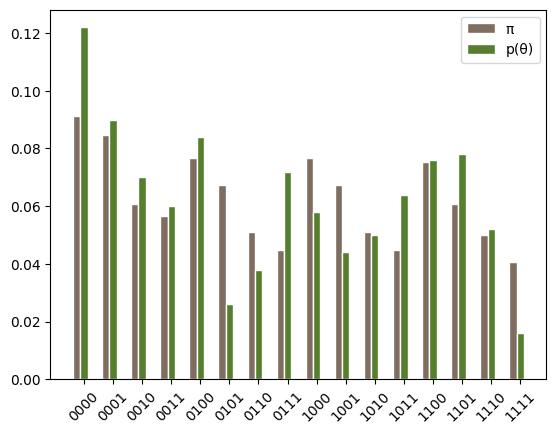

In [13]:
xlabels = []
for j in range(2**nq):
    xlabels.append(ut.binstr_from_int(j,nq))

print(xlabels)

barWidth = 0.25
 
r1 = np.arange(len(pi_vec))
r2 = [x + barWidth for x in r1]
plt.bar(r1, pi_vec, color='#7f6d5f', width=barWidth, edgecolor='white', label='π')
plt.bar(r2, phat, color='#557f2d', width=barWidth, edgecolor='white', label='p(θ)')
plt.xticks([r + barWidth for r in range(len(pi_vec))], xlabels, rotation=45)
plt.legend()
plt.show()

In [14]:
path = '/home/alb/Scrivania/Quantum/Projects/BornMachine/data/'
np.savetxt(path+'KLHypercubeTraining4qb400italpha010_theta_opt.csv', theta_opt, delimiter=',')
np.savetxt(path+'KLHypercubeTraining4qb400italpha010_KL_history.csv', KL_history, delimiter=',')
np.savetxt(path+'KLHypercubeTraining4qb400italpha010_TV_history.csv', TV_history, delimiter=',')